In [2]:
import scanpy as sc
#import pertpy as pt
import omicverse as ov
ov.plot_set()

%load_ext autoreload
%autoreload 2

🔬 Starting plot initialization...
🧬 Detecting CUDA devices…
✅ [GPU 0] Tesla V100-SXM2-16GB
    • Total memory: 15.8 GB
    • Compute capability: 7.0

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

🔖 Version: 1.7.2rc1   📚 Tutorials: https://omicverse.readthedocs.io/
✅ plot_set complete.



In [2]:
!wget https://datasets.cellxgene.cziscience.com/f0060f56-2fb6-4d69-9766-12c5dc64cca8.h5ad -O data/Bone_Marrow_medium.h5ad

--2025-06-08 20:50:37--  https://datasets.cellxgene.cziscience.com/f0060f56-2fb6-4d69-9766-12c5dc64cca8.h5ad
Resolving datasets.cellxgene.cziscience.com (datasets.cellxgene.cziscience.com)... 3.168.86.114, 3.168.86.94, 3.168.86.96, ...
Connecting to datasets.cellxgene.cziscience.com (datasets.cellxgene.cziscience.com)|3.168.86.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2753147007 (2.6G) [binary/octet-stream]
Saving to: ‘data/Bone_Marrow_medium.h5ad’

100%[====================================>] 2,753,147,007 65.4MB/s   in 44s    

2025-06-08 20:51:22 (59.2 MB/s) - ‘data/Bone_Marrow_medium.h5ad’ saved [2753147007/2753147007]



In [3]:
adata = sc.read(
    'data/Bone_Marrow_medium.h5ad',
)
adata

AnnData object with n_obs × n_vars = 263159 × 28121
    obs: 'AuthorCellType', 'AuthorCellType_Broad', 'Shannon.Diversity.Normalized', 'nCount_RNA', 'nFeature_RNA', 'Study', 'donor_id', 'Sorting', 'S.Score', 'G2M.Score', 'CyclePhase', 'scrublet_scores', 'assay_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'is_primary_data', 'organism_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'suspension_type', 'tissue_ontology_term_id', 'sex_ontology_term_id', 'cell_type_ontology_term_id', 'Donor_Age_Group', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'HCA_Hay2018', 'Oetjen2018', 'Granja2019', 'Mende2022', 'Setty2019', 'Ainciburu2023', 'HVG_intersect3000', 'nCells_Detected', 'nDatasets_Detected', 'gene_symbols', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type'
    uns: 'St

In [6]:
len(adata.obs['AuthorCellType'].unique())

55

In [8]:
len(adata.obs['AuthorCellType_Broad'].unique())

24

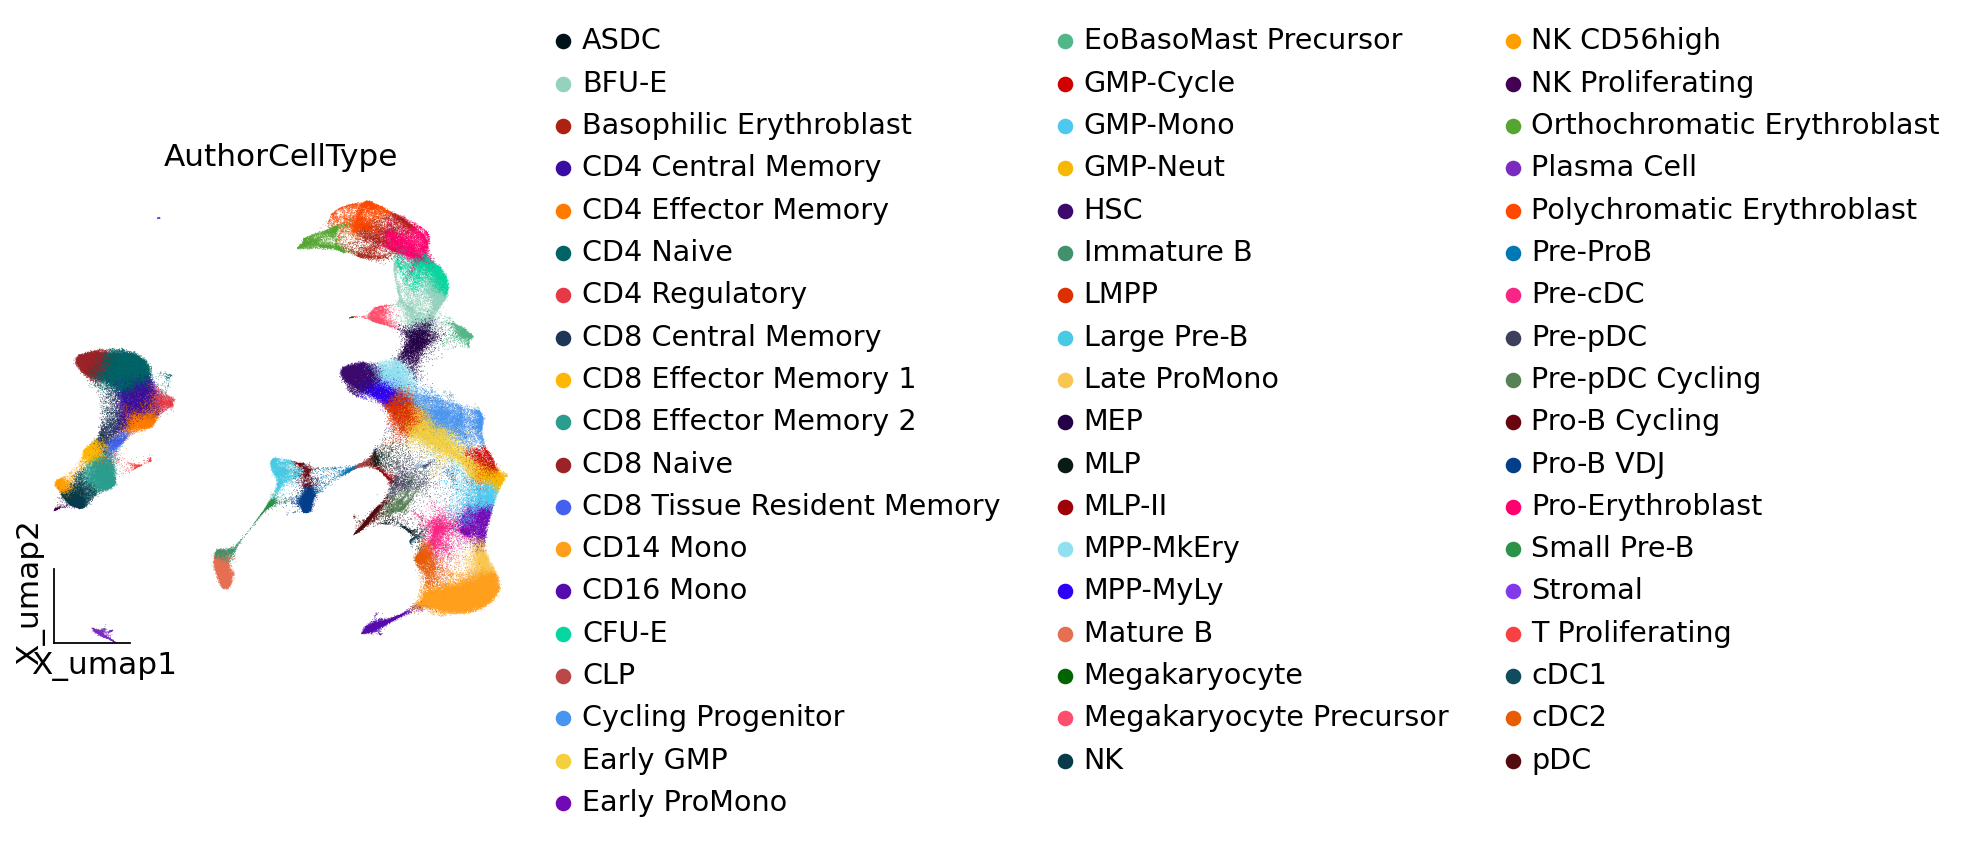

In [9]:
ov.pl.embedding(
    adata,
    basis='X_umap',
    color=['AuthorCellType'],
    wspace=0.55,
    ncols=1
)

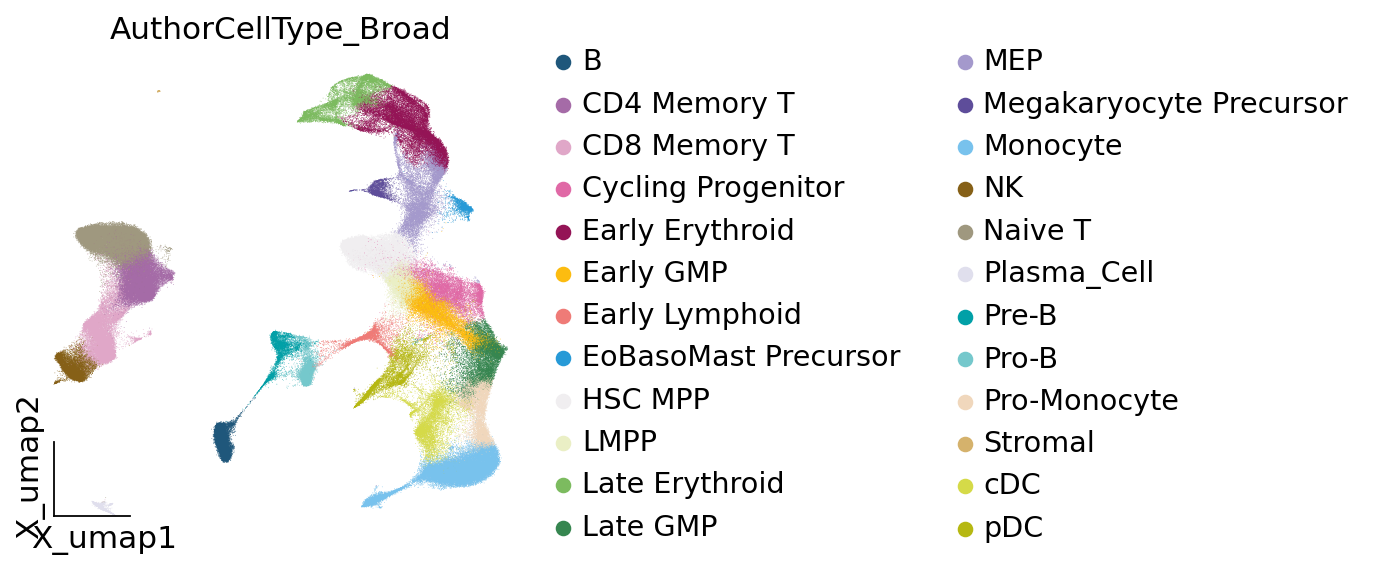

In [10]:
ov.pl.embedding(
    adata,
    basis='X_umap',
    color=['AuthorCellType_Broad'],
    wspace=0.55,
    ncols=1
)

In [12]:
# 
mapper = ov.single.CellOntologyMapper(
    cl_obo_file="new_ontology/cl.json",
    model_name="sentence-transformers/all-MiniLM-L6-v2",
    local_model_dir="./my_models"
)

🔨 Creating ontology resources from OBO file...
📖 Parsing ontology file...
🧠 Creating NLP embeddings...
🔄 Loading model sentence-transformers/all-MiniLM-L6-v2...
🌐 Checking network connectivity...
✓ Network connection available
🇨🇳 Using HF-Mirror (hf-mirror.com) for faster downloads in China
📁 Models will be saved to: ./my_models
🪞 Downloading model from HF-Mirror: sentence-transformers/all-MiniLM-L6-v2
✓ Model loaded successfully from HF-Mirror!
🔄 Encoding 16841 ontology labels...


Batches:   0%|          | 0/527 [00:00<?, ?it/s]

💾 Embeddings saved to: new_ontology/ontology_embeddings.pkl
📋 Ontology mappings included: 16841 cell types
✓ Ontology resources creation completed!


In [33]:
mapper = ov.single.CellOntologyMapper(
    cl_obo_file="new_ontology/cl.json",
    embeddings_path='new_ontology/ontology_embeddings.pkl',
    local_model_dir="./my_models"
)

📥 Loading existing ontology embeddings...
📥 Loaded embeddings for 16841 ontology labels
📋 Ontology mappings loaded: 16841 cell types


In [13]:

mapper.setup_llm_expansion(
    api_type="openai", model='gpt-4o-2024-11-20',
    tissue_context="Bone",    # 组织上下文
    species="Homo sapiens",                   # 物种信息
    study_context="A Balanced Bone Marrow Reference Map of Hematopoietic Development",
    api_key="sk-*"
)
mapper.load_cell_taxonomy_resource("new_ontology/Cell_Taxonomy_resource.txt", 
                                   species_filter=["Homo sapiens", "Mus musculus"])


✓ Loaded 4 cached abbreviation expansions
✓ LLM expansion functionality setup complete (Type: openai, Model: gpt-4o-2024-11-20)
🧬 Tissue context: Lung
🔬 Study context: Atlas-level integration of lung data
🐭 Species: Homo sapiens
📊 Loading Cell Taxonomy resource from: new_ontology/Cell_Taxonomy_resource.txt
✓ Loaded 226222 taxonomy entries
🐭 Filtered by species ['Homo sapiens', 'Mus musculus']: 224736/226222 entries
🧠 Creating embeddings for 2540 taxonomy cell types...


Batches:   0%|          | 0/80 [00:00<?, ?it/s]

✓ Created taxonomy embeddings for 2540 cell types
📈 Species distribution:
  🐭 Mus musculus: 141727 entries
  🐭 Homo sapiens: 83009 entries
🧬 Unique cell types: 2540
🎯 Unique markers: 25818


True

In [14]:
mapper.setup_llm_expansion(
    api_type="openai", model='gpt-4o-2024-11-20',
    tissue_context="Bone",    # 组织上下文
    species="Homo sapiens",                   # 物种信息
    study_context="A Balanced Bone Marrow Reference Map of Hematopoietic Development",
    api_key="sk-*"
)

✓ Loaded 4 cached abbreviation expansions
✓ LLM expansion functionality setup complete (Type: openai, Model: gpt-4o-2024-11-20)
🧬 Tissue context: Bone
🔬 Study context: A Balanced Bone Marrow Reference Map of Hematopoietic Development
🐭 Species: Homo sapiens


True

In [15]:
enhanced_results = mapper.map_adata_with_taxonomy(
    adata, 
    cell_name_col="AuthorCellType_Broad",
    new_col_name="enhanced_cell_ontology",
    expand_abbreviations=True,
    use_taxonomy=True,
    species="Homo sapiens",
    tissue_context="Bone",
    threshold=0.3,
)

📊 Using 24 unique cell names from column 'AuthorCellType_Broad'
📝 Step 1: Expanding abbreviations
🔍 Analyzing cell names...
🧬 Using tissue context: Bone
🔬 Using study context: A Balanced Bone Marrow Reference Map of Hematopoietic Development
🐭 Species: Homo sapiens
  🔤 Identified potential abbreviation: Pre-B
  🔤 Identified potential abbreviation: B
  🔤 Identified potential abbreviation: Pro-B
  🔤 Identified potential abbreviation: HSC MPP
  🔤 Identified potential abbreviation: pDC
  🔤 Identified potential abbreviation: CD4 Memory T
  🔤 Identified potential abbreviation: NK
  🔤 Identified potential abbreviation: CD8 Memory T
  🔤 Identified potential abbreviation: cDC
  🔤 Identified potential abbreviation: LMPP
  🔤 Identified potential abbreviation: MEP
  🔤 Identified potential abbreviation: Pro-Monocyte

🤖 Expanding 12 abbreviations using LLM...
  📝 [1/12] Expanding: Pre-B
    ✓ → Precursor B cell (Confidence: high)
    💡 Alternatives: Pre-B lymphocyte, Pre-B progenitor cell
  📝 [2/12]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

  🤖 [1/24] LLM selecting for: Early Lymphoid
    ✓ LLM selected: immature innate lymphoid cell (rank 4, sim: 0.554)
    💡 Reasoning: Immature innate lymphoid cells are a biologically accurate match for the 'Early Lymphoid' designatio...
  🤖 [2/24] LLM selecting for: Early Erythroid
    ✓ LLM selected: erythroid progenitor cell (rank 1, sim: 0.699)
    💡 Reasoning: The term 'erythroid progenitor cell' is biologically accurate and aligns well with the early stages ...
  🤖 [3/24] LLM selecting for: Cycling Progenitor
    ✓ LLM selected: cycling stromal cell (rank 2, sim: 0.562)
    💡 Reasoning: Stromal cells are a key component of the bone marrow microenvironment and play a critical role in su...
  🤖 [4/24] LLM selecting for: Megakaryocyte Precursor
    ✓ LLM selected: megakaryocyte progenitor cell (rank 6, sim: 0.647)
    💡 Reasoning: The term 'megakaryocyte progenitor cell' is the most biologically accurate and contextually appropri...
  🤖 [5/24] LLM selecting for: Plasma_Cell
    ✓ LLM

In [76]:
adata.obs.to_csv('data/bone_anno.csv')

In [4]:
adata.obs=ov.read('data/bone_anno.csv',index_col=0)

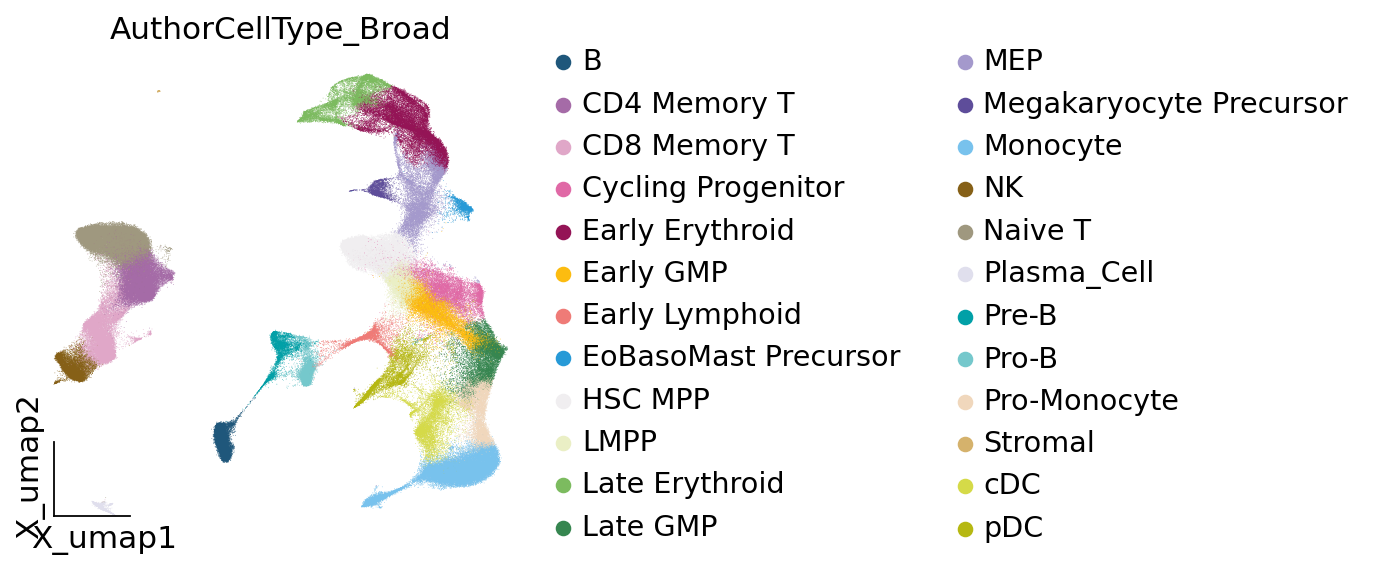

In [5]:
ov.pl.embedding(
    adata,
    basis='X_umap',
    color=['AuthorCellType_Broad'],
    wspace=0.55,
    ncols=2
)

In [43]:
type_dict=dict(zip(
    adata.obs['AuthorCellType_Broad'],
    adata.obs['enhanced_cell_ontology_taxonomy_match'],
))

In [66]:
adata.obs['AuthorCellType_Broad'].cat.categories

Index(['B', 'CD4 Memory T', 'CD8 Memory T', 'Cycling Progenitor',
       'Early Erythroid', 'Early GMP', 'Early Lymphoid',
       'EoBasoMast Precursor', 'HSC MPP', 'LMPP', 'Late Erythroid', 'Late GMP',
       'MEP', 'Megakaryocyte Precursor', 'Monocyte', 'NK', 'Naive T',
       'Plasma_Cell', 'Pre-B', 'Pro-B', 'Pro-Monocyte', 'Stromal', 'cDC',
       'pDC'],
      dtype='object')

In [68]:
len(adata.uns['AuthorCellType_Broad_colors'])

24

In [44]:
color_dict=dict(zip(
    adata.obs['AuthorCellType_Broad'].cat.categories,
    adata.uns['AuthorCellType_Broad_colors'],
))

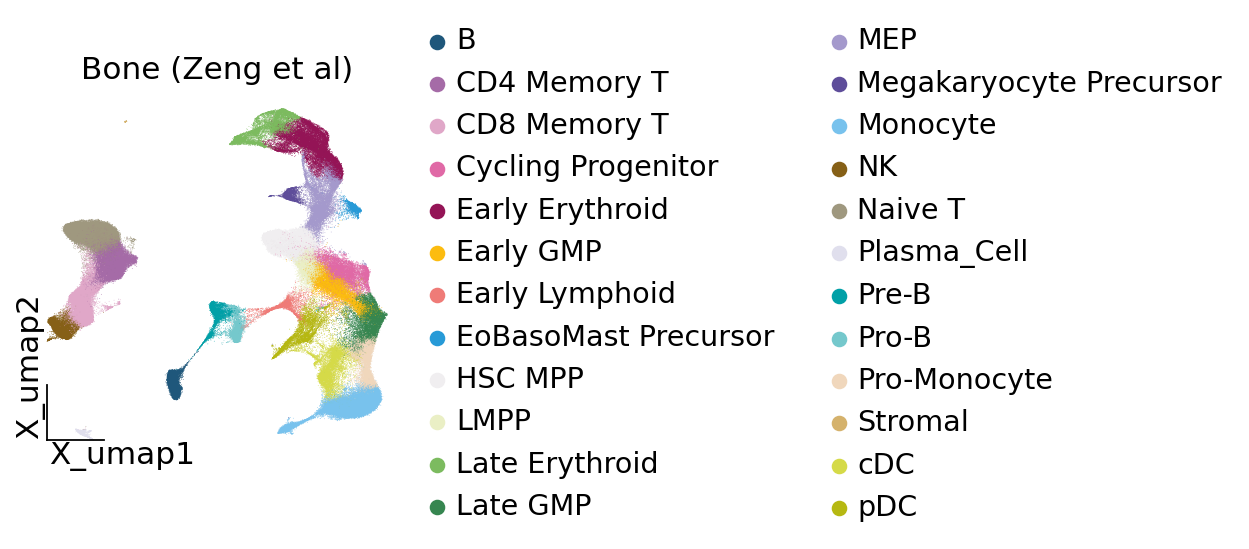

In [53]:
fig, ax = ov.plt.subplots(figsize=(3,3))
ov.pl.embedding(
    adata,
    basis='X_umap',
    color='AuthorCellType_Broad',
    title='Bone (Zeng et al)',
    show=False,
    palette=color_dict,
    ax=ax,
    #size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-bone-author-33.png',dpi=300,bbox_inches='tight')

In [59]:
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))
#new_type_color_dict

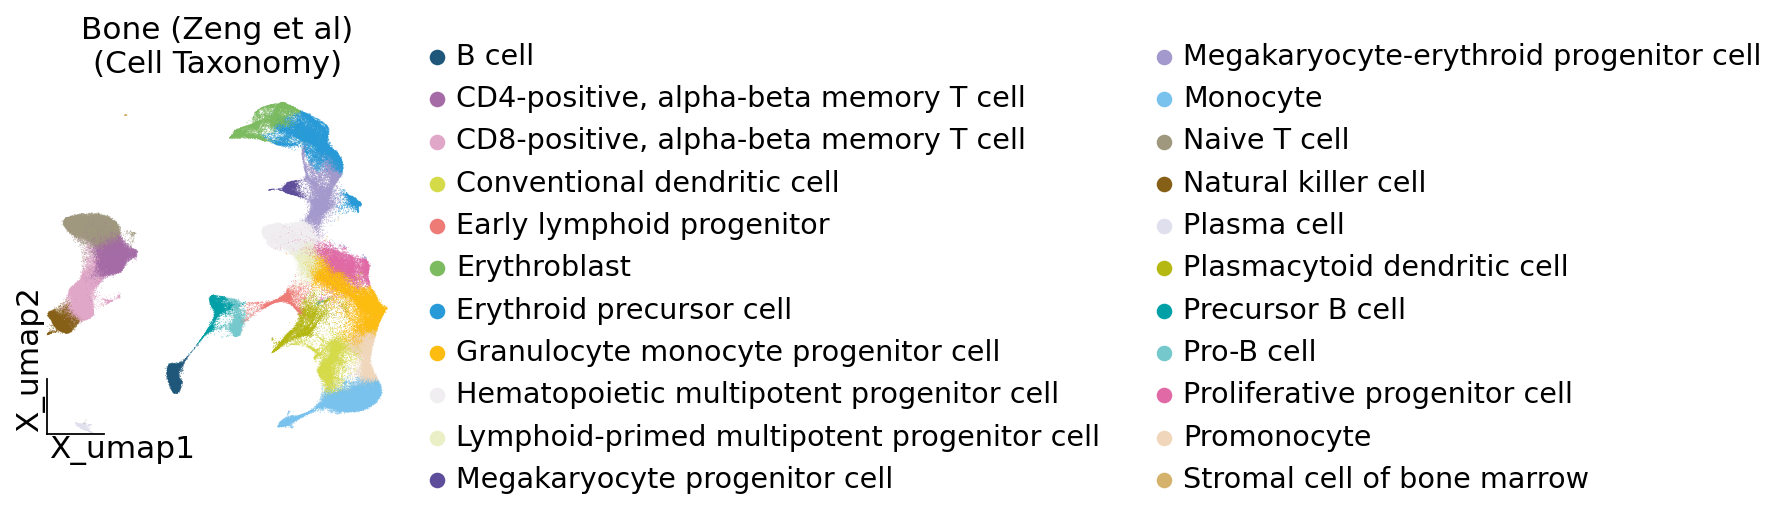

In [71]:
fig, ax = ov.plt.subplots(figsize=(3,3))
ov.pl.embedding(
    adata,
    basis='X_umap',
    color='enhanced_cell_ontology_taxonomy_match',
    title='Bone (Zeng et al)\n(Cell Taxonomy)',
    show=False,
    palette=new_type_color_dict,
    #palette=rgba_list_to_hex(cmaps.greenorange_12.colors)+ov.pl.sc_color[11:],
    ax=ax,
    #size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-bone-taxonomy-33.png',dpi=300,bbox_inches='tight')

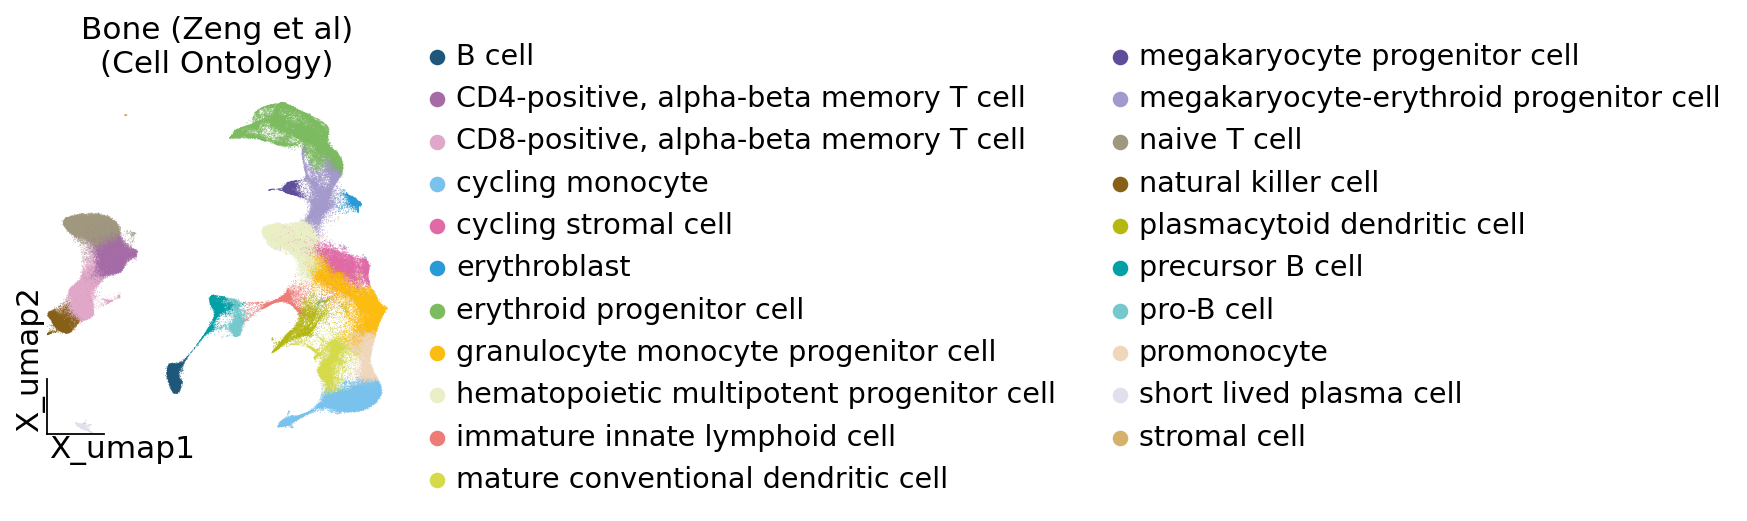

In [73]:
fig, ax = ov.plt.subplots(figsize=(3,3))

goal='enhanced_cell_ontology'

type_dict=dict(zip(
    adata.obs['AuthorCellType_Broad'],
    adata.obs[goal],
))
color_dict=dict(zip(
    adata.obs['AuthorCellType_Broad'].cat.categories,
    adata.uns['AuthorCellType_Broad_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))
#new_type_color_dict


ov.pl.embedding(
    adata,
    basis='X_umap',
    color=goal,
    title='Bone (Zeng et al)\n(Cell Ontology)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    #size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-bone-ontology-33.png',dpi=300,bbox_inches='tight')

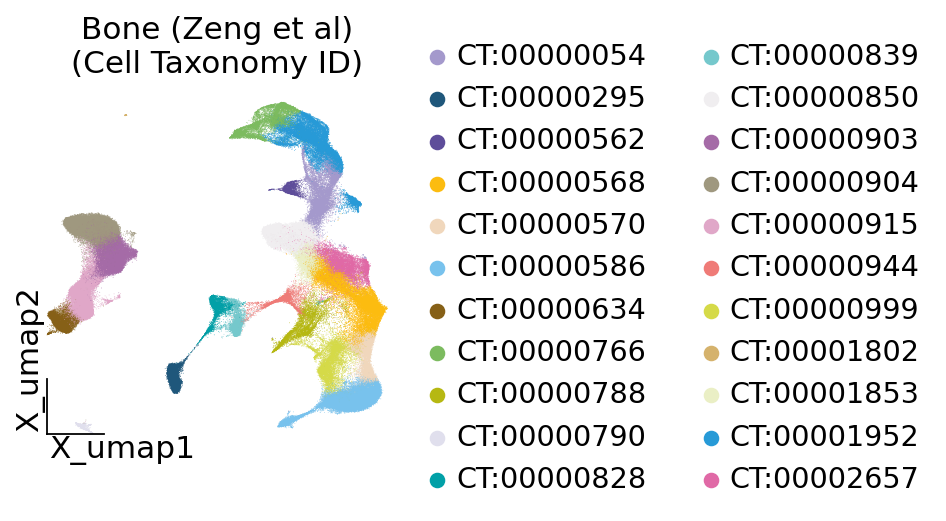

In [74]:
fig, ax = ov.plt.subplots(figsize=(3,3))

goal='enhanced_cell_ontology_ct_id'

type_dict=dict(zip(
    adata.obs['AuthorCellType_Broad'],
    adata.obs[goal],
))
color_dict=dict(zip(
    adata.obs['AuthorCellType_Broad'].cat.categories,
    adata.uns['AuthorCellType_Broad_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))
#new_type_color_dict


ov.pl.embedding(
    adata,
    basis='X_umap',
    color=goal,
    title='Bone (Zeng et al)\n(Cell Taxonomy ID)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    #size=10,
)


ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-bone-taxonomy-id-33.png',dpi=300,bbox_inches='tight')

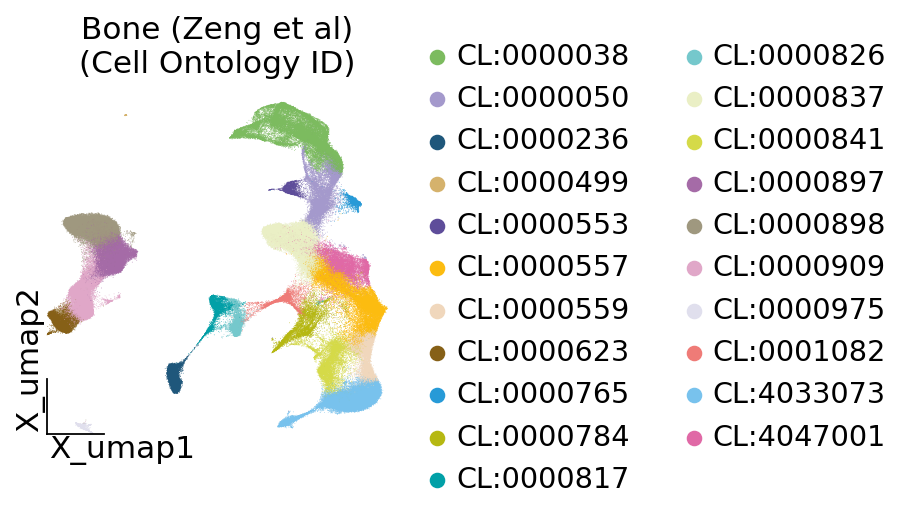

In [75]:
fig, ax = ov.plt.subplots(figsize=(3,3))

goal='enhanced_cell_ontology_cl_id'

type_dict=dict(zip(
    adata.obs['AuthorCellType_Broad'],
    adata.obs[goal],
))
color_dict=dict(zip(
    adata.obs['AuthorCellType_Broad'].cat.categories,
    adata.uns['AuthorCellType_Broad_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))
#new_type_color_dict


ov.pl.embedding(
    adata,
    basis='X_umap',
    color=goal,
    title='Bone (Zeng et al)\n(Cell Ontology ID)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    #size=10,
)


ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

#fig.savefig(f'figures/umap-lung-author-33.svg',dpi=300,bbox_inches='tight')
fig.savefig(f'figures/umap-bone-ontology-id-33.png',dpi=300,bbox_inches='tight')

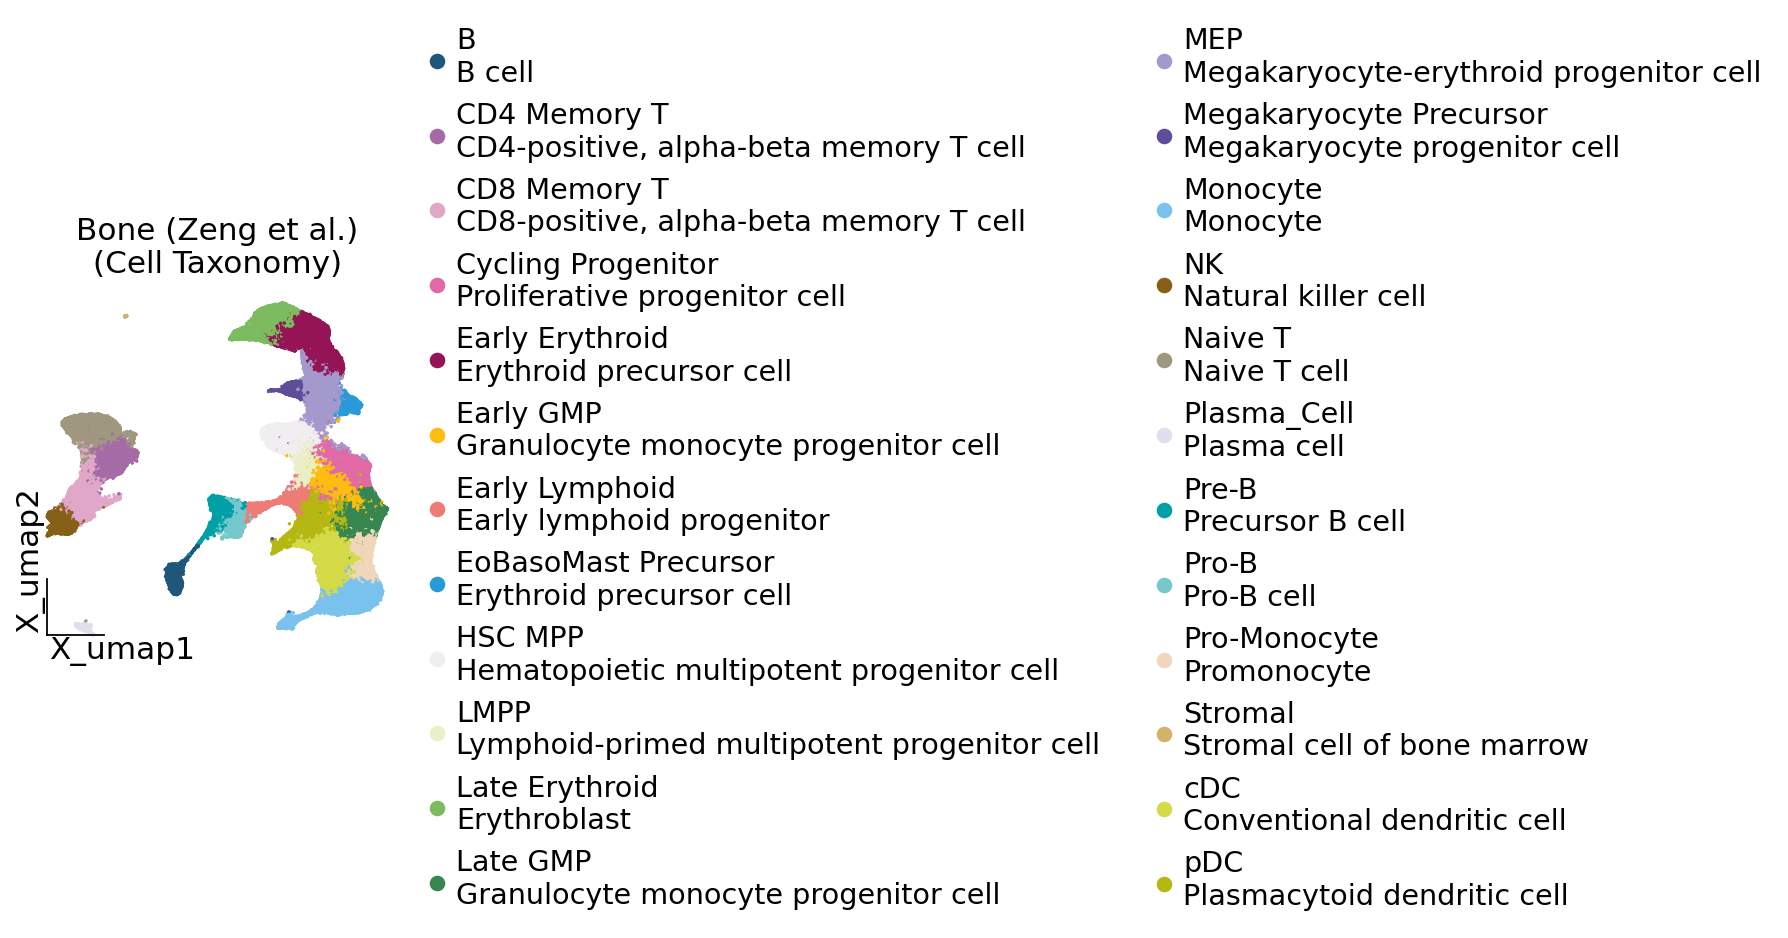

In [10]:
goal='enhanced_cell_ontology_taxonomy_match'

adata.obs['vis_ct']=[i+'\n'+j for i,j in zip(
    adata.obs['AuthorCellType_Broad'].tolist(),
    adata.obs[goal].tolist(),
)
]

fig, ax = ov.plt.subplots(figsize=(3,3))

type_dict=dict(zip(
    adata.obs['AuthorCellType_Broad'],
    adata.obs['vis_ct'],
))
color_dict=dict(zip(
    adata.obs['AuthorCellType_Broad'].cat.categories,
    adata.uns['AuthorCellType_Broad_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))

ov.pl.embedding(
    adata,
    basis='X_umap',
    color='vis_ct',
    title='Bone (Zeng et al.)\n(Cell Taxonomy)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

fig.savefig(f'figures/umap-bone-Taxonomy-match-33.png',dpi=300,bbox_inches='tight')

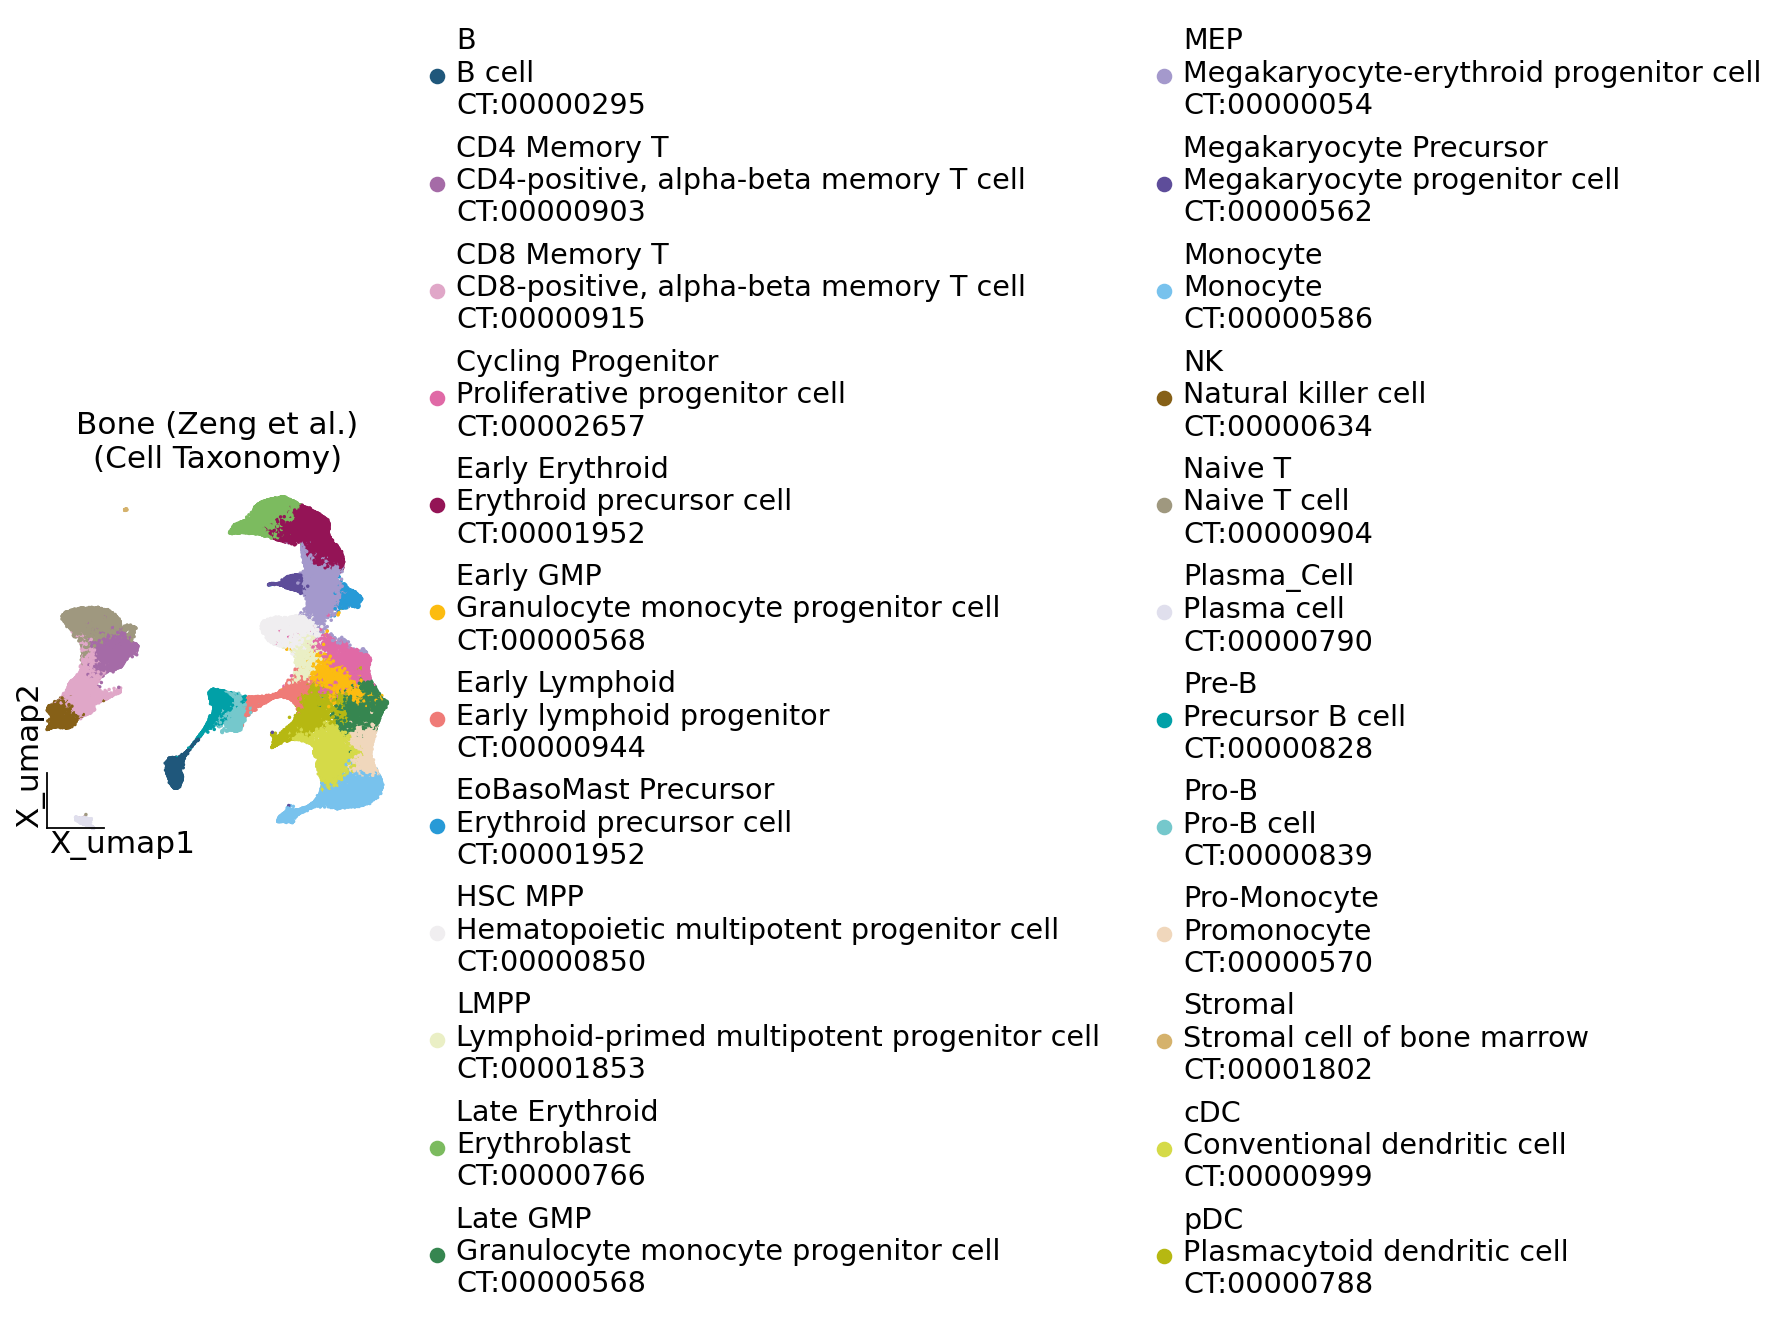

In [11]:
goal='enhanced_cell_ontology_taxonomy_match'

adata.obs['vis_ct']=[i+'\n'+j+'\n'+k for i,j,k in zip(
    adata.obs['AuthorCellType_Broad'].tolist(),
    adata.obs[goal].tolist(),
    adata.obs['enhanced_cell_ontology_ct_id'].tolist(),
)
]

fig, ax = ov.plt.subplots(figsize=(3,3))

type_dict=dict(zip(
    adata.obs['AuthorCellType_Broad'],
    adata.obs['vis_ct'],
))
color_dict=dict(zip(
    adata.obs['AuthorCellType_Broad'].cat.categories,
    adata.uns['AuthorCellType_Broad_colors'],
))
new_type_color_dict=dict(zip(
    [type_dict[k] for k in type_dict.keys()],
    [color_dict[i] for i in type_dict.keys()]
))

ov.pl.embedding(
    adata,
    basis='X_umap',
    color='vis_ct',
    title='Bone (Zeng et al.)\n(Cell Taxonomy)',
    show=False,
    palette=new_type_color_dict,
    ax=ax,
    size=10,
)

ax.xaxis.set_label_coords(0.05, 0.04)
ax.yaxis.set_label_coords(0.04, 0.05)

fig.savefig(f'figures/umap-bone-Taxonomy-match-id-33.png',dpi=300,bbox_inches='tight')